In [1]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Read the csv file using pd.read_csv and excel sheet using pd.read_excel
# Download the dataset from kaggle 
df=pd.read_csv("dataset.csv")
# To read top five data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#TO SEE THE INFORMATION OF DATASET USE filename.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


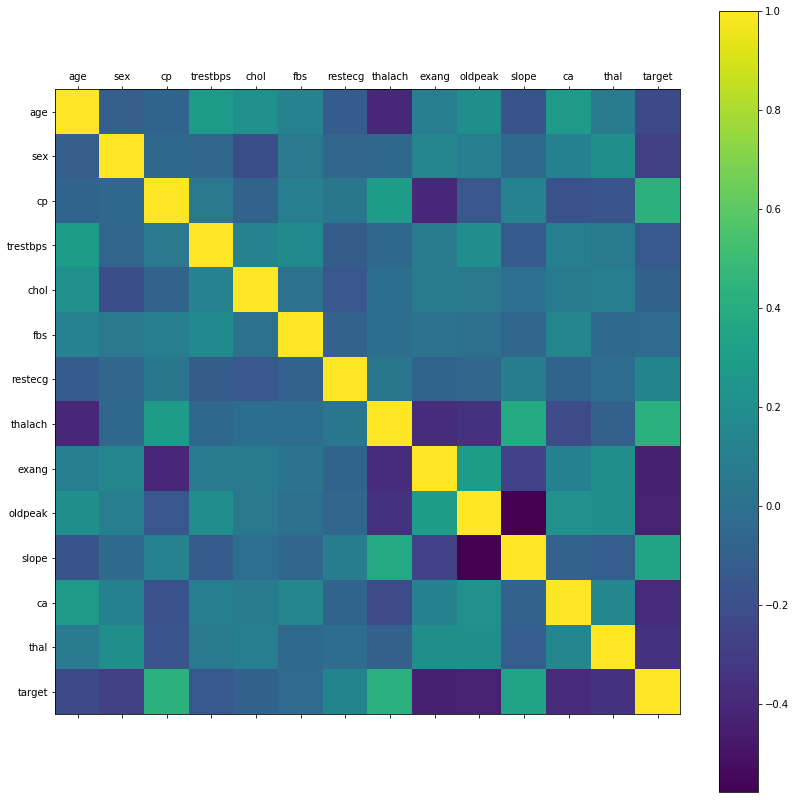

In [6]:
#Let’s see the correlation matrix of features and try to analyse it
rcParams['figure.figsize'] = 20, 14  #figure size is defined using rcParams
plt.matshow(df.corr())              #to plot the correlation matrix
plt.yticks(np.arange(df.shape[1]), df.columns) # xticks and yticks, I’ve added names to the correlation matrix. 
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()                                #colorbar() shows the colorbar for the matrix.

In [7]:
# We see that some of the features have a negative correlation with the target value and some have positive.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc0ddfafcc0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fc0ddd67828>]], dtype=object)

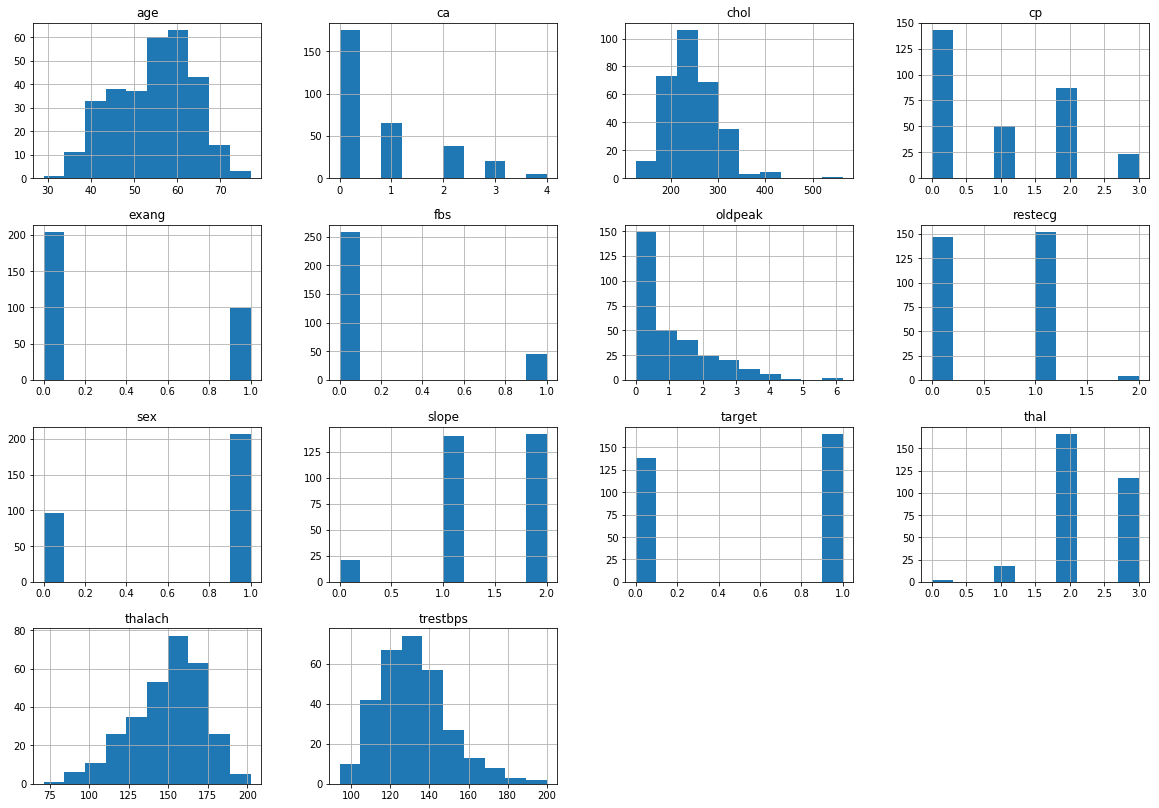

In [8]:
# It shows how each feature and label is distributed along different ranges, which further confirms the need for scaling.
df.hist()        

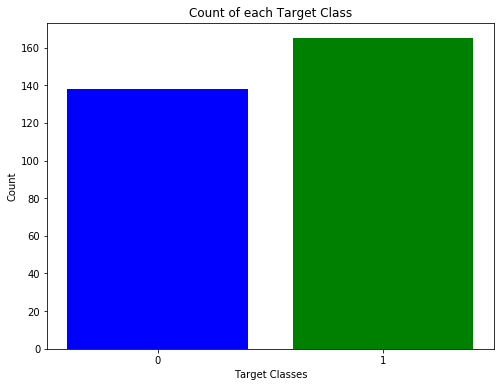

In [9]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(),df['target'].value_counts(),color=['green','blue'])
plt.xticks([0,1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [10]:
# converting dummy variables and scaling the values
df = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])


In [11]:
#The fit_transform() method of the scaler scales the data and we update the columns.

standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

In [12]:
#Splitting the dataset into 67% training data and 33% testing data.
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [13]:
#K NEAREST NEIGBOUR
#This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class,it assigns a class to this data point.
#However, the number of neighbors can be varied. 
#I varied them from 1 to 20 neighbors and calculated the test score in each case.

In [14]:
knn_scores=[]
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_scores.append(knn.score(X_test,y_test))

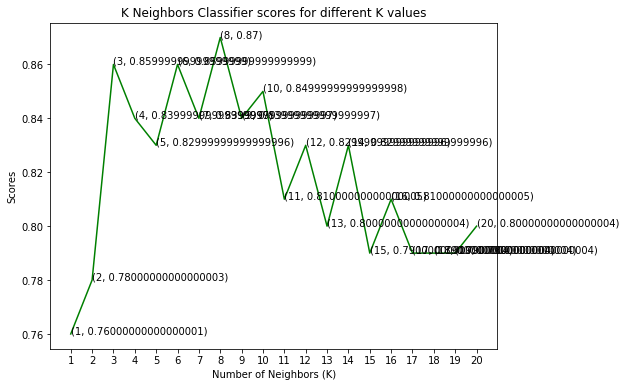

In [15]:
plt.plot([k for k in range(1,21)],knn_scores,color='green')
for i in range(1,21):
     plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [17]:
#As you can see, we achieved the maximum score of 87% when the number of neighbors was chosen to be 8.

In [18]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors = 8)
score=cross_val_score(knn,X,y,cv=10)

In [19]:
score.mean()

0.84109380793474231

In [20]:
#DECISION TREE CLASSIFIER
#This classifier creates a decision tree based on which, it assigns the class values to each data point.
#Here, we can vary the maximum number of features to be considered while creating the model

In [21]:
dt = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt.append(dt_classifier.score(X_test, y_test))

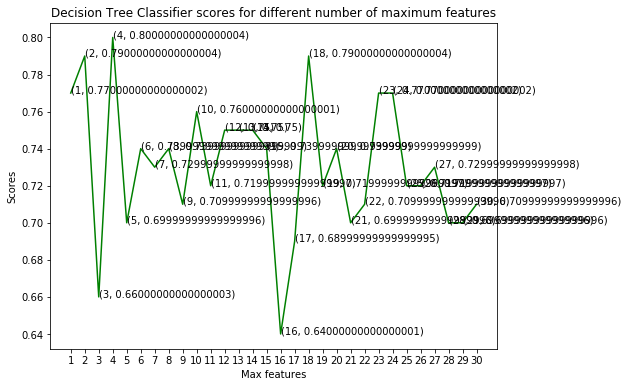

In [23]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt[i-1], (i, dt[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [24]:
#From the line graph above, we can clearly see that the maximum score is 79% and is achieved for maximum features being selected to be either 2, 4 or 18.

In [25]:
#RANDOM FOREST CLASSIFIER
#This classifier takes the concept of decision trees to the next level.
#It creates a forest of trees where each tree is formed by a random selection of features from the total features. 
#Here, we can vary the number of trees that will be used to predict the class.
#I calculate test scores over 10, 100, 200, 500 and 1000 trees.

In [26]:
rf = []
estimators = [20, 100, 200, 500, 1000]
for i in estimators:
    rf_c = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_c.fit(X_train, y_train)
    rf.append(rf_c.score(X_test, y_test))

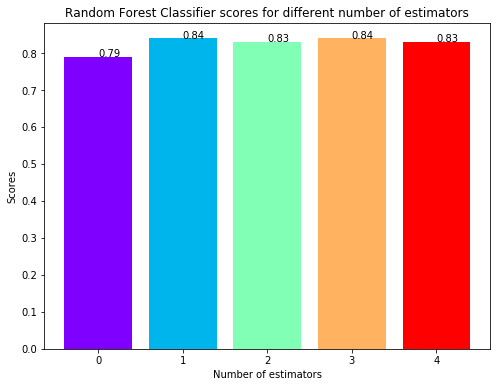

In [27]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf[i], rf[i])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')


In [28]:
#Conclusion
#The project involved analysis of the heart disease patient dataset with proper data processing.
#Then,3 models were trained and tested with maximum scores as follows:
#K Neighbors Classifier: 87%
#Decision Tree Classifier: 79%
#Random Forest Classifier: 84%

In [29]:
#K Neighbors Classifier scored the best score of 87% with 8 neighbors.